In [5]:
import numpy as np

import fitparse
from plotnine import *
from functions import *

import numpy as np
import pandas as pd
import scipy.io
from scipy import signal

import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
from datetime import datetime

import os
os.chdir('C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate1')


In [6]:
fitfile = fitparse.FitFile('tp-3912799.2023-05-15-09-17-45-718Z.GarminPing.AAAAAGRh-LkJc44-.FIT')


HRV_with_time = fit_RR_intervals_with_last_known_timestamp(fitfile)

HRV_time = HRV_with_time['rr_interval']



# After getting the interpolated data
interpolated_data, changed_values_count = interpolate_missing_packages_count(HRV_with_time['rr_interval'])
print("Number of values changed:", changed_values_count)

Number of values changed: 214


In [7]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=HRV_with_time["timestamp"],
    y=60/interpolated_data,
    name="Interpolated"
))
fig2.add_trace(go.Scatter(
    x=HRV_with_time["timestamp"],
    y=60/HRV_time,
    name="Original"
))
fig2.update_layout(
    title="HRV",
    xaxis_title="Timestamps", yaxis_title="HRV [bpm]",
    legend_title="Legend",
    font=dict(
        family="Courier New, monospace", size=18, color="RebeccaPurple"
    )
)

fig2.show()

In [8]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=HRV_with_time["timestamp"],
    y=interpolated_data,
    name="Interpolated"
))
fig2.add_trace(go.Scatter(
    x=HRV_with_time["timestamp"],
    y=HRV_time,
    name="Original"
))
fig2.update_layout(
    title="HRV",
    xaxis_title="Timestamps", yaxis_title="RR",
    legend_title="Legend",
    font=dict(
        family="Courier New, monospace", size=18, color="RebeccaPurple"
    )
)

fig2.show()

# Testing DFA Alpha1, different functions in order to calculate with a sliding window

In [9]:

# ----------------------------------
#  Filtering data
# ----------------------------------
df_original = pd.DataFrame()
df_original['timestamp'] = HRV_with_time['timestamp']
df_original['RR'] = HRV_with_time['rr_interval']


seconds_array = []
start_time = HRV_with_time['timestamp'][0]

for i in HRV_with_time['timestamp']:
    a = start_time
    b = i
    c = b-a
    # print(a, b)
    seconds_array.append(c.total_seconds())


df_t = pd.DataFrame()
df_t['timestamp'] = seconds_array
df_t['RR'] = HRV_with_time['rr_interval']

In [10]:
interpolated_data, changed_values_count = interpolate_missing_packages_count(HRV_with_time['rr_interval'])
print("Number of values changed:", changed_values_count)


window_size = 120

seconds_array = []
start_time = HRV_with_time['timestamp'][0]

for i in HRV_with_time['timestamp']:
    a = start_time
    b = i
    c = b-a
    seconds_array.append(c.total_seconds())


df_t = pd.DataFrame()
df_t['timestamp'] = seconds_array
df_t['RR'] = interpolated_data


features_df_t = computeFeatures(df_t)

HRV_time = HRV_with_time['rr_interval']


x_box = range(0, len(df_t['RR']))

# headers = ['durationStart', 'durationEnd' , 'feasible' , 'alpha' , 'sdnn' , 'rmssd' ,'pArtifacts', 'heartRate', 'power', 'pace']

# alpha_runalyze = pd.read_csv('hrv-dfa-alpha1.80348892.csv')

Number of values changed: 214


c:\Users\Olsen\Desktop\Masteroppgave\Code\functions.py:271: RuntimeWarning:

divide by zero encountered in log2



In [14]:
headers = ['durationStart', 'durationEnd' , 'feasible' , 'alpha' , 'sdnn' , 'rmssd' ,'pArtifacts', 'heartRate', 'power', 'pace']

alpha_runalyze = pd.read_csv('hrv-dfa-alpha1.80348892.csv')

data_alpha1 = features_df_t['alpha1']
diff = abs(len(features_df_t['alpha1'])-len(alpha_runalyze['alpha']))
same_length = data_alpha1[diff:]
same_length = same_length.reset_index(drop=True)

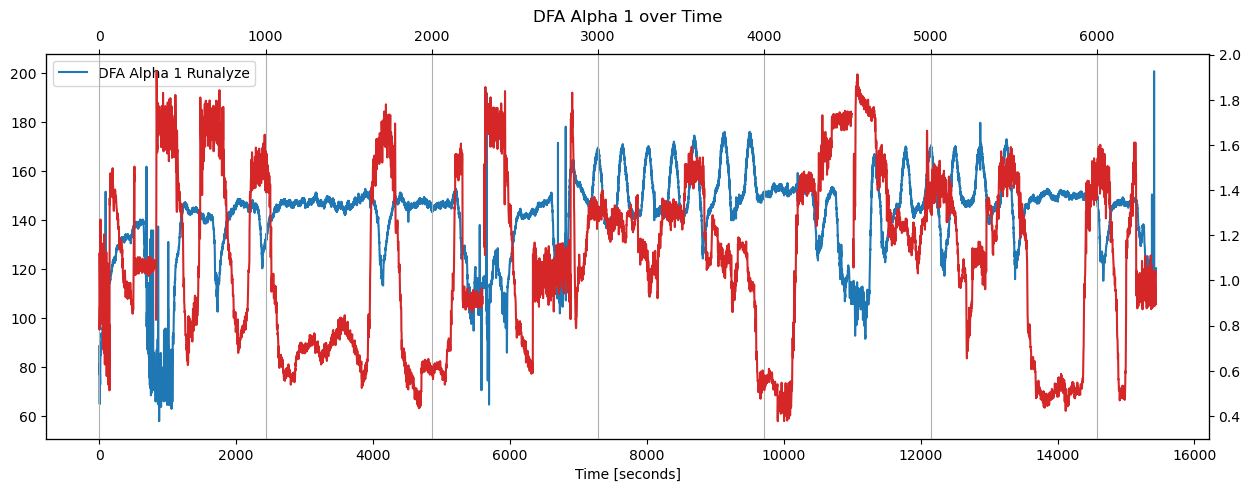

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.set_xlabel('Time [seconds]')
ax.plot(60/interpolated_data, '-', color='tab:blue', label='DFA Alpha 1 Runalyze')

ax2 = ax.twinx().twiny()
#ax.plot(same_length,'-', color='tab:green', label='DFA Alpha 1 Window calculation')
ax2.plot(features_df_t['alpha1'],'-', color='tab:red', label='DFA Alpha 1 Window calculation')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax.legend()

plt.title('DFA Alpha 1 over Time')
plt.grid(True)
plt.show()

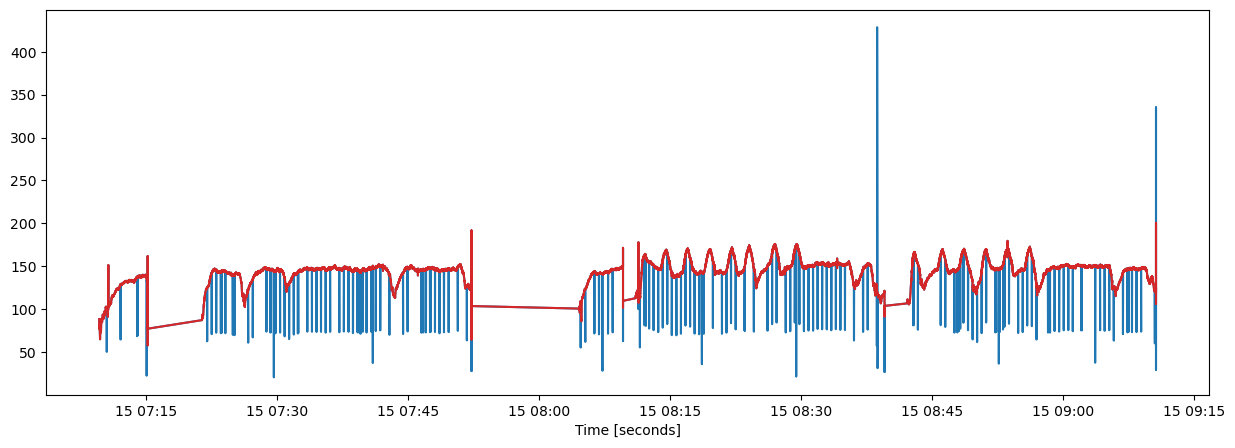

In [13]:
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot the synthetic signal on the primary y-axis
ax1.set_xlabel('Time [seconds]')
# ax1.set_ylabel('HR', color='tab:blue')
ax1.plot(HRV_with_time['timestamp'], 60/HRV_with_time['rr_interval'], color='tab:blue')
ax1.plot(HRV_with_time['timestamp'],60/interpolated_data, color='tab:red')
# ax1.tick_params(axis='y', labelcolor='tab:blue')
# ax1.set_ylabel('DFA Alpha 1', color='tab:blue')
# ax1.plot(alpha_runalyze['durationStart'], alpha_runalyze['alpha'], '-', color='tab:blue', label='DFA Alpha 1 Runalyze')
# ax1.plot(features_df['alpha1'], 'o', color='tab:green', label='DFA Alpha 1 Window calculation')
